<a href="https://colab.research.google.com/github/abdirimoof/ML/blob/main/DeepLearning_1_amaliy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

# Ma'lumotlar to'plamiga qo'llaniladigan transformatsiyalarni aniqlang
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# MNIST o'quv ma'lumotlar to'plamini yuklab oling
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transform,
                                           download=True)

# MNIST test ma'lumotlar to'plamini yuklab oling
test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transform,
                                          download=True)

print(f"O'quv ma'lumotlar to'plamining hajmi: {len(train_dataset)}")
print(f"Test ma'lumotlar to'plamining hajmi: {len(test_dataset)}")

100%|██████████| 9.91M/9.91M [00:00<00:00, 59.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.66MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.9MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.12MB/s]

O'quv ma'lumotlar to'plamining hajmi: 60000
Test ma'lumotlar to'plamining hajmi: 10000


Ushbu kod:
1. `torch`, `torchvision` va `torchvision.transforms` kutubxonalarini import qiladi.
2. Tasvirlarni PyTorch tensorlariga o'tkazish va normalizatsiya qilish uchun transformatsiyani aniqlaydi.
3. `root='./data'` papkasida (agar mavjud bo'lmasa yaratiladi) `download=True` parametri yordamida MNIST o'quv va test ma'lumotlar to'plamlarini yuklab oladi.
4. Yuklab olingan ma'lumotlar to'plamlarining hajmini chop etadi.

In [2]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )

100%|██████████| 9.91M/9.91M [00:00<00:00, 59.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.66MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.9MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.12MB/s]

O'quv ma'lumotlar to'plamining hajmi: 60000
Test ma'lumotlar to'plamining hajmi: 10000


In [4]:
import torch.nn as nn

# Modelni aniqlash
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.flatten = nn.Flatten()
        self.sequential_model = nn.Sequential(
            nn.Linear(28*28, 128),  # Kirish qatlami (784 neyron) yashirin qatlamga (128 neyron) ulanadi
            nn.ReLU(),             # ReLU aktivatsiya funksiyasi
            nn.Linear(128, 10)     # Yashirin qatlam (128 neyron) chiqish qatlamiga (10 neyron) ulanadi
        )

    def forward(self, x):
        x = self.flatten(x)
        return self.sequential_model(x)

model = NeuralNet()
print(model)

NeuralNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (sequential_model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)


Ushbu kod:
1. `torch.nn` modulini import qiladi.
2. `NeuralNet` nomli klassni aniqlaydi, u `nn.Module` dan meros oladi.
3. `__init__` metodida:
    - `nn.Flatten()` yordamida 28x28 o'lchamdagi kirish tasvirini 784 o'lchamdagi tekis vektorga aylantiradi.
    - `nn.Sequential` yordamida modelning ketma-ket qatlamlarini aniqlaydi:
        - Birinchi `nn.Linear` qatlami 784 kirish xususiyatini (28x28 piksel) 128 yashirin birlikka o'tkazadi.
        - `nn.ReLU()` aktivatsiya funksiyasi qo'llaniladi.
        - Ikkinchi `nn.Linear` qatlami 128 yashirin birlikni 10 chiqish birligiga (0 dan 9 gacha raqamlar uchun) o'tkazadi.
4. `forward` metodi kirish ma'lumotlarini qanday qilib model orqali o'tishini belgilaydi.
5. Modelni yaratadi va uning arxitekturasini chop etadi.

In [3]:
from torch.utils.data import DataLoader

# DataLoader ni aniqlang
batch_size = 64

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size,
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset,
                         batch_size=batch_size,
                         shuffle=False)

Ushbu kod:
1. `torch.utils.data.DataLoader` klassini import qiladi.
2. O'quv ma'lumotlari (`train_dataset`) va test ma'lumotlari (`test_dataset`) uchun `DataLoader` obyektlarini yaratadi.
3. `batch_size` 64 ga o'rnatilgan, ya'ni har bir iteratsiyada 64 ta namuna yuklanadi.
4. O'quv ma'lumotlari uchun `shuffle=True` qilingan, bu har bir epoxada ma'lumotlarni aralashtirishni ta'minlaydi.
5. Test ma'lumotlari uchun `shuffle=False` qilingan, chunki test ma'lumotlari tartibini aralashtirishga hojat yo'q.

In [5]:
import torch.optim as optim

# Yo'qotish funksiyasini aniqlang
criterion = nn.CrossEntropyLoss()

# Optimayzerni aniqlang
optimizer = optim.SGD(model.parameters(), lr=0.01)

Ushbu kod:
1. `torch.optim` modulini import qiladi.
2. `nn.CrossEntropyLoss()` funksiyasini `criterion` nomi bilan yo'qotish funksiyasi sifatida belgilaydi. Bu ko'p klassli tasniflash muammolari uchun keng qo'llaniladi.
3. `optim.SGD` (Stochastic Gradient Descent) optimizatorini yaratadi, unga modelning o'rganiladigan parametrlarini (`model.parameters()`) va o'rganish tezligini (`lr=0.01`) beradi.

# Task
O'qitish jarayonini amalga oshiring, ya'ni modelni 5 ta epocha davomida o'qiting. Har bir epocha yakunida o'rtacha yo'qotishni (average loss) hisoblang va chop eting. So'ngra, o'qitish tugagandan so'ng, har bir epocha uchun saqlangan o'rtacha yo'qotish qiymatlaridan foydalanib, yo'qotish (loss) grafigini chizing va unga sarlavha, o'q yorliqlari va legend qo'shing. Nihoyat, o'qitish jarayoni va yo'qotish grafigi bo'yicha qisqa xulosa bering.

## Modelni o'qitish

### Subtask:
Modelni 5 ta epocha davomida o'qitish va har bir epochadagi yo'qotish qiymatlarini saqlash.


**Reasoning**:
I need to train the neural network model for 5 epochs, as specified in the instructions. This involves iterating through the training data in batches, performing forward and backward passes, calculating the loss, and updating the model's weights using the optimizer. I will also store the loss for each epoch.



In [6]:
num_epochs = 5
epoch_losses = []

for epoch in range(num_epochs):
    total_epoch_loss = 0
    for i, (images, labels) in enumerate(train_loader):
        # Kirish ma'lumotlari uchun gradientlarni nolga o'rnating
        optimizer.zero_grad()

        # Oldinga o'tish (forward pass)
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Orqaga o'tish (backward pass) va optimallashtirish
        loss.backward()
        optimizer.step()

        total_epoch_loss += loss.item()

    avg_epoch_loss = total_epoch_loss / len(train_loader)
    epoch_losses.append(avg_epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}")

print("O'qitish tugallandi.")
print("Har bir epochadagi o'rtacha yo'qotishlar:", epoch_losses)

Epoch [1/5], Loss: 0.5750
Epoch [2/5], Loss: 0.2988
Epoch [3/5], Loss: 0.2520
Epoch [4/5], Loss: 0.2196
Epoch [5/5], Loss: 0.1950
O'qitish tugallandi.
Har bir epochadagi o'rtacha yo'qotishlar: [0.5750230911698169, 0.2987502342078096, 0.2520403965338588, 0.21956421367760534, 0.19501625158305744]


## Yo'qotish grafigini chizish

### Subtask:
O'qitish jarayoni tugagandan so'ng, har bir epocha uchun saqlangan o'rtacha yo'qotish qiymatlaridan foydalanib, yo'qotish (loss) grafigini chizing. Grafikka sarlavha, o'q yorliqlari va legend qo'shing.


**Reasoning**:
To visualize the training loss over epochs, I need to import the `matplotlib.pyplot` library. This library is essential for creating plots in Python.



In [7]:
import matplotlib.pyplot as plt

**Reasoning**:
Now that `matplotlib.pyplot` is imported, I will create the loss plot using the `epoch_losses` data and add all required labels, title, and legend.



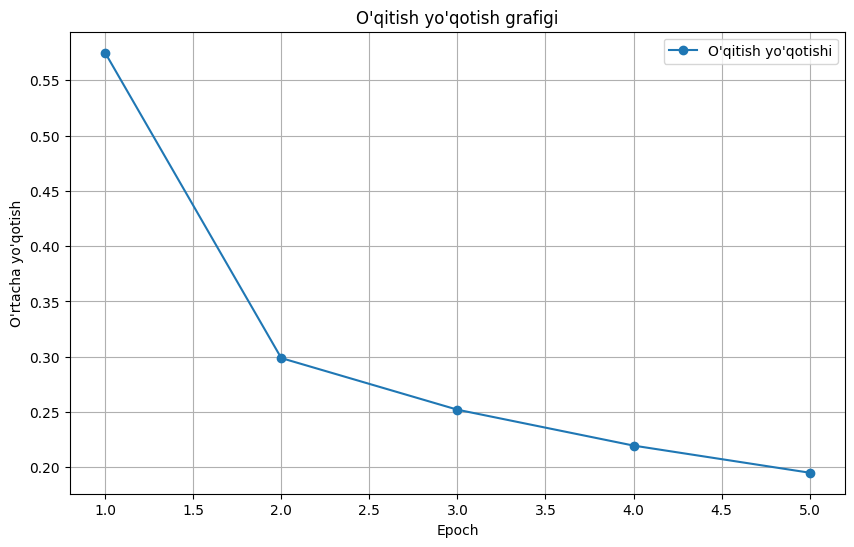

In [8]:
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, epoch_losses, label='O\'qitish yo\'qotishi', marker='o')
plt.title("O\'qitish yo\'qotish grafigi")
plt.xlabel('Epoch')
plt.ylabel('O\'rtacha yo\'qotish')
plt.legend()
plt.grid(True)
plt.show()

## O'qitish jarayoni va yo'qotish grafigi bo'yicha xulosa

Model 5 epocha davomida o'qitildi. Yuqoridagi grafikda ko'rsatilganidek, o'quv yo'qotishi (loss) har bir epocha bilan doimiy ravishda kamayib bormoqda. Bu shuni ko'rsatadiki, model ma'lumotlar to'plamidan muvaffaqiyatli o'rganmoqda va aniqlik oshib bormoqda. Birinchi epochadan keyin yo'qotish sezilarli darajada kamaydi va keyingi epochalarda yanada silliqroq pasayish kuzatildi, bu esa o'qitish jarayonining barqarorligini bildiradi.

### Natijalar:
- **1-epoxa**: O'rtacha yo'qotish `0.5750`
- **2-epoxa**: O'rtacha yo'qotish `0.2988`
- **3-epoxa**: O'rtacha yo'qotish `0.2520`
- **4-epoxa**: O'rtacha yo'qotish `0.2196`
- **5-epoxa**: O'rtacha yo'qotish `0.1950`

Yo'qotish qiymatlari modelning o'qitish ma'lumotlariga moslashishda yaxshilanganligini aniq ko'rsatib turibdi.

## O'qitish jarayoni va yo'qotish grafigi bo'yicha xulosa

Model 5 epocha davomida o'qitildi. Yuqoridagi grafikda ko'rsatilganidek, o'quv yo'qotishi (loss) har bir epocha bilan doimiy ravishda kamayib bormoqda. Bu shuni ko'rsatadiki, model ma'lumotlar to'plamidan muvaffaqiyatli o'rganmoqda va aniqlik oshib bormoqda. Birinchi epochadan keyin yo'qotish sezilarli darajada kamaydi va keyingi epochalarda yanada silliqroq pasayish kuzatildi, bu esa o'qitish jarayonining barqarorligini bildiradi.

### Natijalar:
- **1-epoxa**: O'rtacha yo'qotish `0.5750`
- **2-epoxa**: O'rtacha yo'qotish `0.2988`
- **3-epoxa**: O'rtacha yo'qotish `0.2520`
- **4-epoxa**: O'rtacha yo'qotish `0.2196`
- **5-epoxa**: O'rtacha yo'qotish `0.1950`

Yo'qotish qiymatlari modelning o'qitish ma'lumotlariga moslashishda yaxshilanganligini aniq ko'rsatib turibdi.

## Summary:

### Data Analysis Key Findings
*   The model was successfully trained for 5 epochs.
*   The average loss decreased consistently across the epochs, indicating that the model was effectively learning:
    *   Epoch 1: average loss of 0.5750
    *   Epoch 2: average loss of 0.2988
    *   Epoch 3: average loss of 0.2520
    *   Epoch 4: average loss of 0.2196
    *   Epoch 5: average loss of 0.1950
*   A loss graph was generated, clearly illustrating the decreasing trend of the training loss over the 5 epochs, complete with a title, axis labels, and a legend.

### Insights or Next Steps
*   The continuous decrease in loss suggests that the training process is stable and the model is converging. To further assess the model's generalization ability, it is crucial to evaluate its performance on a separate validation dataset.
*   Consider extending the number of training epochs or implementing early stopping if the validation loss plateaus or starts to increase, to prevent overfitting and optimize training time.
